### PCA on 3D dataset

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$ standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
 *  $x_1$ is distributed as $N(0,1)$
 * $x_2$ is distributed as $x_1+N(0,3)$
 * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import norm, linregress
import scipy.integrate as integrate
import pandas as pd
import seaborn as sns
from scipy import linalg as la

In [61]:
N = 5000

In [62]:
x1 = np.random.normal(loc=0, scale=1, size=5000)

In [63]:
x2 = x1 + np.random.normal(loc=0, scale=3, size=5000)

In [64]:
x3 = 2*x1 + x2

In [65]:
dataset = np.array([x1, x2, x3])
dataset = pd.DataFrame(dataset)
dataset.rename(index={0: "$x_1$", 1: "$x_2$", 2: "$x_3$"})

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
$x_1$,-0.160181,0.068929,0.390417,-0.737494,1.503569,1.944103,0.360714,-1.361132,-0.734335,-0.276178,...,0.191298,0.156798,-0.217345,2.428828,1.245193,-1.097331,0.705426,0.290807,1.569332,-1.710125
$x_2$,-1.185940,2.870247,-0.979697,0.066111,-0.537723,1.762083,2.913146,-5.988505,-1.544863,-4.891263,...,5.053399,-5.603445,-0.354889,0.980962,0.724198,-5.017107,0.770548,-0.933806,0.171682,-5.759474
$x_3$,-1.506302,3.008105,-0.198863,-1.408877,2.469414,5.650290,3.634574,-8.710769,-3.013532,-5.443618,...,5.435994,-5.289848,-0.789580,5.838618,3.214584,-7.211769,2.181400,-0.352192,3.310346,-9.179724


In [66]:
cov_matrix = np.cov(dataset)
print("Covariannce matrix \n\n",cov_matrix)

Covariannce matrix 

 [[ 0.9907464   0.98676802  2.96826082]
 [ 0.98676802 10.15145227 12.12498832]
 [ 2.96826082 12.12498832 18.06150997]]


In [67]:
eigenvalues, eigenvectors = la.eig(cov_matrix)

In [68]:
print("eigenvalues of covariance matrix: \n\n",eigenvalues)

eigenvalues of covariance matrix: 

 [2.71999227e+01+0.j 5.89792043e-16+0.j 2.00378591e+00+0.j]


In [116]:
#print("eigenvectors of covariance matrix: \n\n",eigenvectors)

In [113]:
print("Eigenvectors of covariance  matrix: \n")
for i in range(3):
    print("eigenvector",i,": ",eigenvectors[:,i],"\n")

Eigenvectors of covariance  matrix: 

eigenvector 0 :  [-0.11319096 -0.58019329 -0.8065752 ] 

eigenvector 1 :  [-0.81649658 -0.40824829  0.40824829] 

eigenvector 2 :  [ 0.56614587 -0.70477591  0.42751582] 



### SVD

In [70]:
U, spectrum, Vt = la.svd(dataset)

In [121]:
print("eigenvalues of covariance matrix : \n\n",spectrum**2/(N-1))

eigenvalues of covariance matrix : 

 [2.72046605e+01 2.00385280e+00 6.73198256e-32]


In [120]:
print("eigenvectors of covariance matrix using SVD: \n")
print("eigenvector 0 :", U[:,0],"\n")
print("eigenvector 1 :", U[:,2],"\n")
print("eigenvector 2 :", U[:,1],"\n")

eigenvectors of covariance matrix using SVD: 

eigenvector 0 : [-0.11317831 -0.58020903 -0.80656565] 

eigenvector 1 : [-0.81649658 -0.40824829  0.40824829] 

eigenvector 2 : [ 0.56614839 -0.70476295  0.42753384] 



The eigenvectors founded using the SVD procesure are the same of the other founded linalalg library unless the fourth significant digit. 
The eigenvalues founded using the SVD procesure are the same of the other founded linalalg library unless the second significant digit. 


In [73]:
l, V = np.linalg.eig(np.cov(dataset))
Lambda=np.diag(l)
print ("Lamda matrix: Diagonal matrix filled with eigenvalues of covariance matrix:\n\n",Lambda,"\n")
#print ("trace of covariance matrix: ", np.cov(dataset).trace(),"\n")
print ("trace of Lamda matrix: ", Lambda.trace(),"\n")

#print ("percentage of the total dataset's variability explained by the principal components: ",(Lambda[0,0]/Lambda.trace())*100,"%")
#print("\n")
print("First principal component explains", round(100*Lambda[0,0]/Lambda.trace(),3), "% of the dataset's total variability")
print("Second principal component explains", round(np.abs(100*Lambda[2,2])/Lambda.trace(),3), "% of the dataset's total variability")
print("\n")

print("First plus second principal components explain", (100*Lambda[0,0]/Lambda.trace())+(100*Lambda[2,2]/Lambda.trace()), "% of the dataset's total variability")
print("This makes sense because, for construction, the columns of the dataset are related each other.")

Lamda matrix: Diagonal matrix filled with eigenvalues of covariance matrix:

 [[2.71999227e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.89792043e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00378591e+00]] 

trace of Lamda matrix:  29.203708648543916 

First principal component explains 93.139 % of the dataset's total variability
Second principal component explains 6.861 % of the dataset's total variability


First plus second principal components explain 100.0 % of the dataset's total variability
This makes sense because, for construction, the columns of the dataset are related each other.


### PCA 

In our case the features of the datasets have all zero mean, the covariance matrix is of the form:
$\newline$
$Cov(X) = \frac{XX^{T}}{N-1}$

In [74]:
l0, V0 = np.linalg.eig(np.dot(dataset, dataset.T)/(N-1))
print ("eigenvalues of covariance matrix: \n",l0,"\n")
print ("eigenvectors of covariance matrix: \n",V0)

eigenvalues of covariance matrix: 
 [ 2.72046605e+01 -1.54363514e-15  2.00385280e+00] 

eigenvectors of covariance matrix: 
 [[-0.11317831 -0.81649658  0.56614839]
 [-0.58020903 -0.40824829 -0.70476295]
 [-0.80656565  0.40824829  0.42753384]]


In [75]:
new_dataset = np.dot(V0.T,dataset)
#plt.scatter(new_dataset.T[0], new_dataset.T[1], s = 0.9)

In [76]:
new_dataset = pd.DataFrame(new_dataset)
new_dataset.rename(index={0: "$x_1$", 1: "$x_2$", 2: "$x_3$"})

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
$x_1$,1.921153e+00,-4.099378e+00,6.846388e-01,1.181462e+00,-1.849924e+00,-5.799737e+00,-4.662581e+00,1.065444e+01,3.410065e+00,7.259848e+00,...,-7.338165e+00,7.500033e+00,8.673570e-01,-5.553283e+00,-3.153889e+00,8.851930e+00,-2.286360e+00,7.929556e-01,-2.947237e+00,1.093930e+01
$x_2$,2.105081e-16,-1.097323e-15,1.333902e-15,-1.848540e-15,3.707476e-15,3.653331e-15,-6.321412e-16,-6.283127e-16,-9.268433e-16,1.373485e-15,...,-1.647414e-15,2.688581e-15,-3.156118e-16,5.313167e-15,2.470371e-15,-4.868002e-16,1.157550e-15,1.101989e-15,3.492538e-15,-1.734086e-15
$x_3$,1.011251e-01,-6.977528e-01,8.264674e-01,-1.066466e+00,2.285968e+00,2.274490e+00,-2.949562e-01,-2.742749e-01,-6.153674e-01,9.634925e-01,...,-1.129074e+00,1.776282e+00,-2.105092e-01,3.179938e+00,1.568919e+00,-1.686558e-01,7.889440e-01,6.721780e-01,2.182765e+00,-8.337634e-01


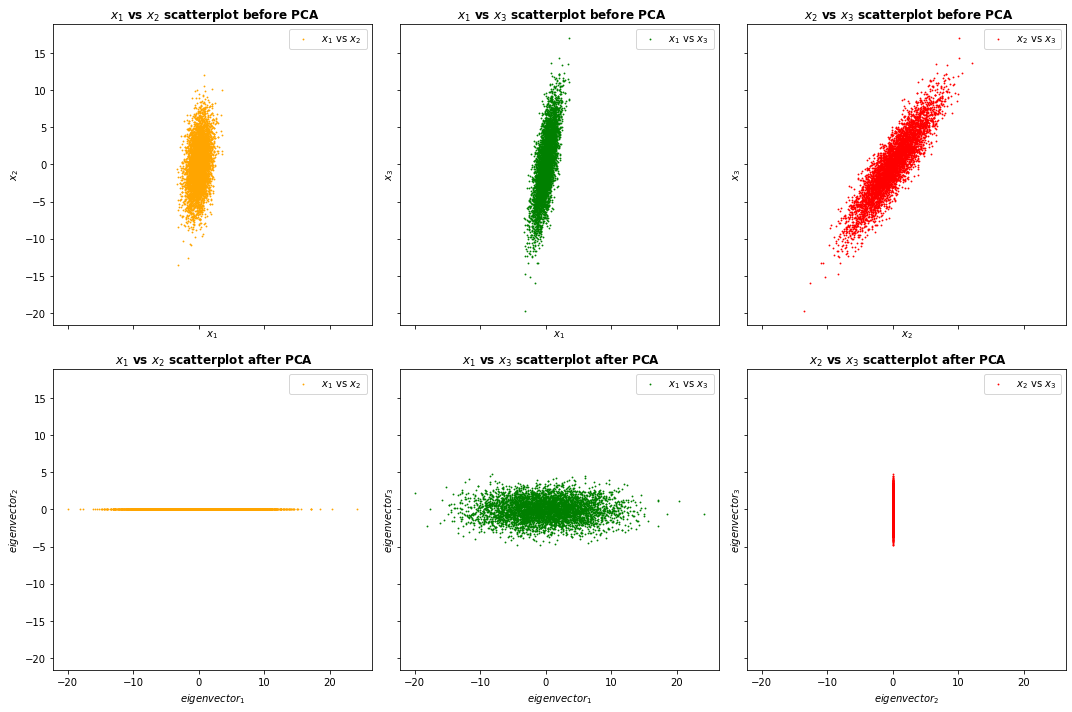

In [88]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10),sharex=True, sharey=True)



axs[0,0].scatter(dataset.T[0], dataset.T[1], s = 0.7, label = "$x_1$ vs $x_2$ ", color = "orange")
axs[0,0].set_title(' $x_1$ vs $x_2$ scatterplot before PCA', fontweight="bold")
axs[0,0].set_xlabel("$x_1$")
axs[0,0].set_ylabel("$x_2$")
#axs[0,0].set_xlim(-10,10)
axs[0,0].legend(loc = "best")





axs[0,1].scatter(dataset.T[0], dataset.T[2], s = 0.7, label = "$x_1$ vs $x_3$ ",color = "green")
axs[0,1].set_title(' $x_1$ vs $x_3$ scatterplot before PCA', fontweight="bold")
axs[0,1].set_xlabel("$x_1$")
axs[0,1].set_ylabel("$x_3$")
axs[0,1].legend(loc = "best")



axs[0,2].scatter(dataset.T[1], dataset.T[2], s = 0.7, label = "$x_2$ vs $x_3$ ",color = "red")
axs[0,2].set_title(' $x_2$ vs $x_3$ scatterplot before PCA', fontweight="bold")
axs[0,2].set_xlabel("$x_2$")
axs[0,2].set_ylabel("$x_3$")
axs[0,2].legend(loc = "best")




#new_dataset = np.dot(V0.T,dataset)
#new_dataset = pd.DataFrame(new_dataset)





axs[1,0].scatter(new_dataset.T[0], new_dataset.T[1], s = 0.7, label = "$x_1$ vs $x_2$ ", color = "orange")
axs[1,0].set_title(' $x_1$ vs $x_2$ scatterplot after PCA', fontweight="bold")
axs[1,0].set_xlabel("$eigenvector_1$")
axs[1,0].set_ylabel("$eigenvector_2$")
axs[1,0].legend(loc = "best")





axs[1,1].scatter(new_dataset.T[0], new_dataset.T[2], s = 0.7, label = "$x_1$ vs $x_3$ ",color = "green")
axs[1,1].set_title(' $x_1$ vs $x_3$ scatterplot after PCA', fontweight="bold")
axs[1,1].set_xlabel("$eigenvector_1$")
axs[1,1].set_ylabel("$eigenvector_3$")
axs[1,1].legend(loc = "best")



axs[1,2].scatter(new_dataset.T[1], new_dataset.T[2], s = 0.7, label = "$x_2$ vs $x_3$ ",color = "red")
axs[1,2].set_title(' $x_2$ vs $x_3$ scatterplot after PCA', fontweight="bold")
axs[1,2].set_xlabel("$eigenvector_2$")
axs[1,2].set_ylabel("$eigenvector_3$")
axs[1,2].legend(loc = "best")

fig.tight_layout()
plt.show()

From the scatterplots in the new coordinates (the second row) we can observe that the eigenvector 1, linked to the major eigenvalue of covariance marix, maximizes the variance of the data when projected onto it.
In fact it is the line in which the projection of the points  is the most spread out:  mathematically speaking, it’s the direction that maximizes the variance 


### PCA on nD dataset
Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$ . 0.02 e 0.06

Repeat the PCA procedure and compare the results with what you obtained before

In [21]:
x4 = np.random.normal(loc=0, scale=0.02, size=5000)
x5 = np.random.normal(loc=0, scale=0.025, size=5000)
x6 = np.random.normal(loc=0, scale=0.03, size=5000)
x7 = np.random.normal(loc=0, scale=0.035, size=5000)
x8 = np.random.normal(loc=0, scale=0.04, size=5000)
x9 = np.random.normal(loc=0, scale=0.045, size=5000)
x10 = np.random.normal(loc=0, scale=0.05, size=5000) 
x11 = np.random.normal(loc=0, scale=0.055, size=5000)
x12 = np.random.normal(loc=0, scale=0.06, size=5000)
x13 = np.random.normal(loc=0, scale=0.06, size=5000)

In [22]:
dataset_nD = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13])
dataset_nD = pd.DataFrame(dataset_nD)
dataset_nD.rename(index={0: "$x_1$", 1: "$x_2$", 2: "$x_3$", 3: "$x_4$", 4: "$x_5$", 5: "$x_6$", 6: "$x_7$", 7: "$x_8$", 8: "$x_9$", 9: "$x_{10}$", 10: "$x_{11}$", 11: "$x_{12}$", 12: "$x_{13}$"})

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
$x_1$,-1.177259,-0.374546,0.044732,-0.575115,1.222410,0.076710,0.172966,1.018222,-0.121328,0.073335,...,2.178411,-1.829526,1.013817,0.565723,1.160909,1.169603,-0.461576,0.430550,-0.047019,-1.359600
$x_2$,-2.742223,-5.944686,-5.236726,-8.778310,-1.889623,0.586339,-4.376301,-1.709175,4.520179,2.072633,...,4.697621,-2.513073,-0.109227,-4.956200,6.476832,-3.308129,-3.116086,-2.245824,1.436314,-1.311762
$x_3$,-5.096740,-6.693779,-5.147263,-9.928539,0.555197,0.739760,-4.030368,0.327270,4.277523,2.219302,...,9.054443,-6.172126,1.918408,-3.824755,8.798650,-0.968923,-4.039238,-1.384723,1.342277,-4.030962
$x_4$,0.001113,0.017281,-0.015654,0.045477,-0.024072,-0.019960,-0.010400,0.006584,-0.022762,-0.020932,...,0.036162,-0.021985,0.006303,-0.001217,0.018467,-0.019825,0.008127,-0.024841,0.010087,-0.017004
$x_5$,-0.015351,0.009623,-0.014292,-0.003242,-0.011916,-0.043519,-0.005347,0.034489,-0.003922,0.075520,...,-0.001578,-0.018953,-0.006389,-0.012621,-0.026905,-0.020543,-0.008575,0.022058,-0.023073,0.026487
$x_6$,0.009533,0.002275,0.022155,0.008502,0.050040,-0.013760,0.022850,-0.023603,-0.007892,0.033343,...,0.018823,0.044032,-0.011875,0.021463,-0.044787,0.007603,-0.009329,-0.005130,-0.068820,-0.039500
$x_7$,-0.017434,0.055410,0.006852,0.034330,0.026424,0.012438,-0.014519,0.015958,0.053732,0.028494,...,0.003815,-0.006642,0.022716,-0.063755,0.013066,-0.022617,-0.004285,0.009837,-0.049704,0.033350
$x_8$,0.061207,-0.052247,-0.016415,-0.024432,0.002100,-0.004677,-0.054806,0.069319,0.084030,0.042085,...,-0.031303,-0.040072,-0.033616,0.026339,0.047435,-0.047762,0.035002,0.020815,0.020482,-0.034851
$x_9$,-0.040459,-0.044035,-0.006305,0.122188,0.021721,-0.054711,0.001941,-0.024595,0.051039,0.057936,...,-0.031694,-0.125944,-0.033529,-0.001538,0.097013,0.079119,0.040011,0.003908,0.020388,0.000845
$x_{10}$,0.040921,-0.028815,-0.034048,-0.028288,-0.019800,0.011638,0.078368,-0.043774,-0.026816,-0.108549,...,0.055680,0.052690,-0.022053,-0.039858,-0.018517,-0.039223,0.042033,-0.000349,-0.026996,0.026209


In [23]:
l1, V1 = np.linalg.eig(np.dot(dataset_nD, dataset_nD.T)/(N-1))
print ("eigenvalues of covariance matrix: \n",l1,"\n")
print ("eigenvectors of covariance matrix: \n",V1)

eigenvalues of covariance matrix: 
 [ 2.68777480e+01  1.95191720e+00  3.71900394e-03  3.56258897e-03
  3.07715302e-03 -2.17398523e-16  2.44701363e-03  1.99770755e-03
  1.65035634e-03  1.20900985e-03  8.79957106e-04  6.40927557e-04
  4.00554271e-04] 

eigenvectors of covariance matrix: 
 [[ 1.15618561e-01 -5.65654697e-01  3.82398277e-05 -2.51343132e-04
   3.36595884e-04 -8.16496581e-01 -3.44912068e-04  1.00646980e-04
   2.42484234e-04  2.20610664e-04 -1.37186982e-04 -1.07797069e-04
  -7.16002445e-06]
 [ 5.77164569e-01  7.07257834e-01 -9.83760055e-05  2.95688551e-04
  -3.35024175e-04 -4.08248290e-01  5.28969813e-04  1.62260589e-05
  -4.03059606e-04 -2.21777775e-04  2.02119204e-04  7.69885829e-05
  -3.69762357e-05]
 [ 8.08401691e-01 -4.24051561e-01 -2.18963501e-05 -2.06997713e-04
   3.38167592e-04  4.08248290e-01 -1.60854323e-04  2.17520019e-04
   8.19088614e-05  2.19443553e-04 -7.22547612e-05 -1.38605556e-04
  -5.12962846e-05]
 [-6.72319733e-05 -1.08243812e-06 -9.79308147e-03  1.49994561

In [24]:
l, V = np.linalg.eig(np.cov(dataset_nD))
Lambda=np.diag(l)
print ("Lamda matrix: Diagonal matrix filled with eigenvalues of covariance matrix:\n\n",Lambda,"\n")
#print ("trace of covariance matrix: ", np.cov(dataset).trace(),"\n")
print ("trace of Lamda matrix: ", Lambda.trace(),"\n")

#print ("percentage of the total dataset's variability explained by the principal components: ",(Lambda[0,0]/Lambda.trace())*100,"%")
#print("\n")
print("First principal component explains", round(100*Lambda[0,0]/Lambda.trace(),3), "% of the dataset's total variability")
print("Second principal component explains", round(np.abs(100*Lambda[1,1])/Lambda.trace(),3), "% of the dataset's total variability")
print("\n")

print("First plus second principal components explain", (100*Lambda[0,0]/Lambda.trace())+(100*Lambda[1,1]/Lambda.trace()), "% of the dataset's total variability")

Lamda matrix: Diagonal matrix filled with eigenvalues of covariance matrix:

 [[2.68746462e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.95095843e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.71895500e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.56258707e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.07690970e-03 0.00000000e+00 0.00000000e+

In [25]:
new_dataset_nD = np.dot(V1.T,dataset_nD)
#plt.scatter(new_dataset.T[0], new_dataset.T[1], s = 0.9)

In [26]:
new_dataset_nD = pd.DataFrame(new_dataset_nD)
new_dataset_nD.rename(index={0: "$x_1$", 1: "$x_2$", 2: "$x_3$", 3: "$x_4$", 4: "$x_5$", 5: "$x_6$", 6: "$x_7$", 7: "$x_8$", 8: "$x_9$", 9: "$x_{10}$", 10: "$x_{11}$", 11: "$x_{12}$", 12: "$x_{13}$"})

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
$x_1$,-5.839028e+00,-8.885645e+00,-7.178338e+00,-1.315927e+01,-5.004731e-01,9.452942e-01,-5.764000e+00,-6.041769e-01,6.052830e+00,2.998821e+00,...,1.028279e+01,-6.651548e+00,1.605008e+00,-5.887069e+00,1.098528e+01,-2.557379e+00,-5.117169e+00,-2.365832e+00,1.908639e+00,-4.172935e+00
$x_2$,8.877988e-01,-1.154028e+00,-1.546401e+00,-1.673050e+00,-2.263331e+00,5.759004e-02,-1.483865e+00,-1.923589e+00,1.451720e+00,4.832617e-01,...,-1.749302e+00,1.874828e+00,-1.464288e+00,-2.203457e+00,1.930345e-01,-2.590511e+00,-2.299429e-01,-1.244748e+00,4.732442e-01,1.550680e+00
$x_3$,7.292791e-02,1.588514e-01,-3.507642e-02,-3.462852e-02,-7.888452e-02,-9.956347e-02,4.523071e-02,5.395235e-02,7.134769e-02,1.402097e-02,...,2.495628e-02,4.526862e-02,1.361382e-03,-2.342665e-02,3.869358e-02,2.494713e-02,-1.311921e-02,-2.928220e-02,-4.361640e-02,7.967253e-02
$x_4$,5.385452e-02,-4.348530e-02,8.345692e-02,7.393895e-02,8.520275e-04,1.175116e-02,-1.373895e-02,4.478925e-03,3.817478e-02,1.499703e-02,...,-9.651461e-02,-6.143063e-02,5.162755e-02,-5.880952e-02,2.259696e-02,8.534238e-02,7.372578e-02,-1.440237e-02,3.910918e-03,-4.585981e-02
$x_5$,1.650004e-02,8.851107e-03,-5.859098e-02,3.885046e-02,2.572072e-02,-4.738072e-02,5.315609e-02,-4.679036e-02,4.745924e-02,3.006043e-02,...,-4.882323e-02,-8.071864e-02,-4.584112e-02,-4.958304e-02,2.836593e-02,1.087569e-02,-8.487871e-03,-5.818887e-02,8.470587e-02,1.485903e-02
$x_6$,-5.653134e-16,-9.384247e-16,-8.552324e-16,-1.853966e-15,-1.500830e-16,4.097598e-17,-9.762801e-16,1.395466e-16,6.658435e-16,3.549181e-16,...,8.608525e-16,-6.507462e-16,2.778446e-16,-7.609262e-16,1.873216e-15,-2.296901e-16,-7.719672e-16,-2.686606e-16,2.164167e-16,-3.410301e-16
$x_7$,-4.797597e-02,2.210914e-02,2.788181e-02,3.697190e-02,2.175750e-02,-1.692252e-02,-7.882763e-02,3.791802e-02,3.171531e-02,1.143021e-01,...,-5.581935e-02,-6.487123e-02,1.545039e-02,3.858264e-02,2.901816e-02,4.182895e-02,-4.116090e-02,-6.534794e-04,3.121530e-02,-2.478989e-02
$x_8$,3.666076e-02,4.901825e-02,8.933919e-03,-1.212570e-01,-2.149840e-02,5.170418e-02,-9.956441e-03,3.043452e-02,-4.507966e-02,-4.606098e-02,...,2.782961e-02,1.192086e-01,3.733595e-02,3.033882e-03,-9.135902e-02,-7.315926e-02,-4.469953e-02,-4.697870e-03,-1.860121e-02,-2.450605e-03
$x_9$,6.149552e-02,-5.367399e-02,-1.170705e-02,-2.154137e-02,4.851840e-03,-2.053568e-03,-5.456363e-02,6.930918e-02,8.004369e-02,3.997835e-02,...,-3.182413e-02,-3.834914e-02,-3.202032e-02,3.024291e-02,4.402562e-02,-4.553465e-02,3.654458e-02,2.214190e-02,1.880752e-02,-3.879483e-02
$x_{10}$,-1.725874e-02,5.821157e-02,3.839643e-03,3.259534e-02,2.225904e-02,1.083532e-02,-1.545819e-02,1.986638e-02,5.530436e-02,2.624952e-02,...,6.875909e-03,-8.960132e-03,2.329313e-02,-6.355220e-02,1.793641e-02,-2.342868e-02,-4.278279e-03,1.014084e-02,-4.727281e-02,3.589509e-02


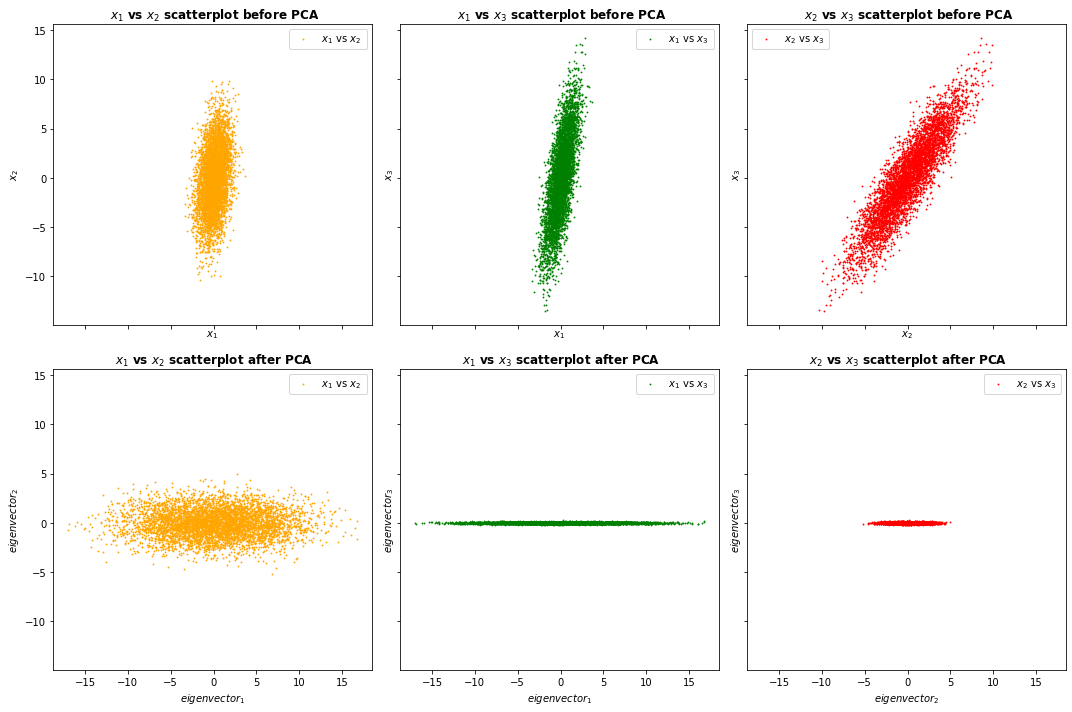

In [89]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10),sharex=True, sharey=True)


axs[0,0].scatter(dataset_nD.T[0], dataset_nD.T[1], s = 0.7, label = "$x_1$ vs $x_2$ ", color = "orange")
axs[0,0].set_title(' $x_1$ vs $x_2$ scatterplot before PCA', fontweight="bold")
axs[0,0].set_xlabel("$x_1$")
axs[0,0].set_ylabel("$x_2$")
axs[0,0].legend(loc = "best")





axs[0,1].scatter(dataset_nD.T[0], dataset_nD.T[2], s = 0.7, label = "$x_1$ vs $x_3$ ",color = "green")
axs[0,1].set_title(' $x_1$ vs $x_3$ scatterplot before PCA', fontweight="bold")
axs[0,1].set_xlabel("$x_1$")
axs[0,1].set_ylabel("$x_3$")
axs[0,1].legend(loc = "best")



axs[0,2].scatter(dataset_nD.T[1], dataset_nD.T[2], s = 0.7, label = "$x_2$ vs $x_3$ ",color = "red")
axs[0,2].set_title(' $x_2$ vs $x_3$ scatterplot before PCA', fontweight="bold")
axs[0,2].set_xlabel("$x_2$")
axs[0,2].set_ylabel("$x_3$")
axs[0,2].legend(loc = "best")




#new_dataset_nD = np.dot(V0.T,dataset_nD)
#new_dataset_nD = pd.DataFrame(new_dataset_nD)





axs[1,0].scatter(new_dataset_nD.T[0], new_dataset_nD.T[1], s = 0.7, label = "$x_1$ vs $x_2$ ", color = "orange")
axs[1,0].set_title(' $x_1$ vs $x_2$ scatterplot after PCA', fontweight="bold")
axs[1,0].set_xlabel("$eigenvector_1$")
axs[1,0].set_ylabel("$eigenvector_2$")
axs[1,0].legend(loc = "best")





axs[1,1].scatter(new_dataset_nD.T[0], new_dataset_nD.T[2], s = 0.7, label = "$x_1$ vs $x_3$ ",color = "green")
axs[1,1].set_title(' $x_1$ vs $x_3$ scatterplot after PCA', fontweight="bold")
axs[1,1].set_xlabel("$eigenvector_1$")
axs[1,1].set_ylabel("$eigenvector_3$")
axs[1,1].legend(loc = "best")



axs[1,2].scatter(new_dataset_nD.T[1], new_dataset_nD.T[2], s = 0.7, label = "$x_2$ vs $x_3$ ",color = "red")
axs[1,2].set_title(' $x_2$ vs $x_3$ scatterplot after PCA', fontweight="bold")
axs[1,2].set_xlabel("$eigenvector_2$")
axs[1,2].set_ylabel("$eigenvector_3$")
axs[1,2].legend(loc = "best")

fig.tight_layout()
plt.show()

Despite we have added 10 uncorrelated variables normal distributed, the pricipal component is still the $eigenvector_1$
What has changed is the second principal component: in fact, the previous case it was the $eigenvector_3$, wheras now it's the $eigenvector_2$

### Looking at an oscillating spring (optional)
Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i,\phi_i)$, the angles in spherical coordinates.

Start from the simulation of the records (say $O(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.

### spring 3D

In [136]:
t = np.arange(0,10,0.01)
A = 2
w = 2
phi = 2

x = A*np.cos(w*t + phi)
y = np.random.normal(loc =0,scale=0.01, size=1000)
z = np.random.normal(loc =0,scale=0.02, size=1000)

Text(0, 0.5, 'x(t)')

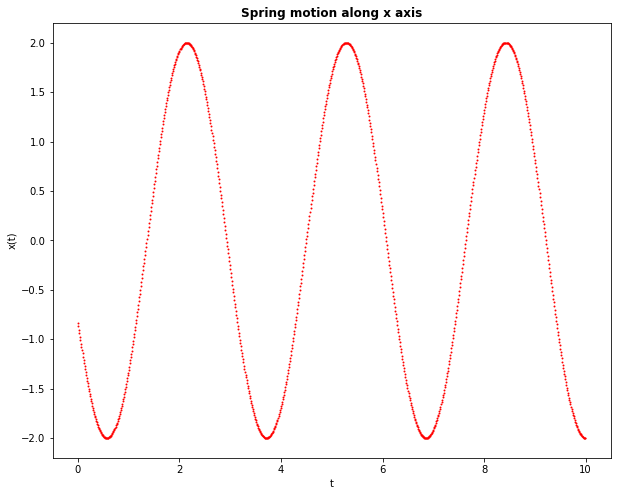

In [137]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(t,x,s=0.9,color="red")
#ax.plot(t,x,color = "red")
ax.set_title("Spring motion along x axis",fontweight='bold')
ax.set_xlabel("t")
ax.set_ylabel("x(t)")

In [138]:
from scipy.spatial.transform import Rotation as R
alfa1 = 2*np.pi*np.random.random(1)[0]
beta1 = 2*np.pi*np.random.random(1)[0]
gamma1 = 2*np.pi*np.random.random(1)[0]

alfa2 = 2*np.pi*np.random.random(1)[0]
beta2 = 2*np.pi*np.random.random(1)[0]
gamma2 = 2*np.pi*np.random.random(1)[0]

In [139]:
r1 = R.from_euler("xyz",[alfa1,beta1,gamma1])
V1= r1.as_matrix()

r2 = R.from_euler("xyz",[alfa2,beta2,gamma2])
V2= r2.as_matrix()

In [140]:
#this is the dataset of the 3 coordinates of the spring, recorded by the camera A (perpendicular to the plane of the spring's motion)
dataset = np.array([x,y,x])
dataset = pd.DataFrame(dataset)
dataset.rename(index={0: "$x_A$", 1: "$y_A$", 2:"$z_A$"})

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
$x_A$,-0.832294,-0.868497,-0.904352,-0.939846,-0.974964,-1.009692,-1.044016,-1.077923,-1.111398,-1.144429,...,-1.963573,-1.970780,-1.977198,-1.982825,-1.987659,-1.991698,-1.994940,-1.997384,-1.999030,-1.999876
$y_A$,-0.012592,0.024043,-0.005938,0.005479,-0.005335,-0.013499,-0.009162,0.009804,0.004386,-0.006589,...,0.005872,-0.020115,0.005715,-0.002611,0.000663,0.013889,0.008315,0.008688,-0.010718,-0.014399
$z_A$,-0.832294,-0.868497,-0.904352,-0.939846,-0.974964,-1.009692,-1.044016,-1.077923,-1.111398,-1.144429,...,-1.963573,-1.970780,-1.977198,-1.982825,-1.987659,-1.991698,-1.994940,-1.997384,-1.999030,-1.999876


In [141]:
#this is the dataset of the 3 coordinates of the spring, recorded by the camera B (rotated).
dataset_rot1 = np.dot(V1.T,dataset)
dataset_rot1 = pd.DataFrame(dataset_rot1)
dataset_rot1.rename(index={0: "$x_B$", 1: "$y_B$", 2: "$z_B$"})

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
$x_B$,-0.206307,-0.195374,-0.220023,-0.222421,-0.236631,-0.249329,-0.255237,-0.253213,-0.264141,-0.277937,...,-0.467677,-0.483318,-0.471029,-0.476835,-0.476241,-0.470129,-0.473891,-0.474277,-0.485062,-0.487235
$y_B$,0.578010,0.631802,0.634021,0.667881,0.684347,0.702579,0.730158,0.768715,0.788177,0.803045,...,1.391074,1.376140,1.400573,1.398132,1.404068,1.417111,1.415106,1.417119,1.403328,1.401090
$z_B$,-1.004453,-1.035281,-1.088738,-1.127438,-1.173377,-1.217931,-1.257675,-1.291856,-1.333956,-1.377443,...,-2.357428,-2.375077,-2.373853,-2.383495,-2.388171,-2.388449,-2.394273,-2.397081,-2.405772,-2.408062


In [142]:
#this is the dataset of the 3 coordinates of the spring, recorded by the camera C (rotated).
dataset_rot2 = np.dot(V2.T,dataset)
dataset_rot2 = pd.DataFrame(dataset_rot2)
dataset_rot2.rename(index={0: "$x_C$", 1: "$y_C$", 2: "$z_C$"})

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
$x_C$,0.963867,1.019307,1.050132,1.095581,1.132514,1.169956,1.211471,1.257817,1.294799,1.329245,...,2.286917,2.285858,2.302713,2.306235,2.313049,2.322556,2.324303,2.327282,2.322144,2.321791
$y_C$,0.666525,0.671174,0.719161,0.739760,0.774615,0.807427,0.831736,0.846136,0.876160,0.909471,...,1.549193,1.571906,1.560072,1.569973,1.571653,1.566189,1.572402,1.574092,1.588098,1.591176
$z_C$,0.110852,0.140319,0.125582,0.138233,0.136095,0.135657,0.143448,0.160875,0.162077,0.159533,...,0.285108,0.268916,0.286955,0.282243,0.285105,0.294450,0.291220,0.291817,0.279190,0.276871


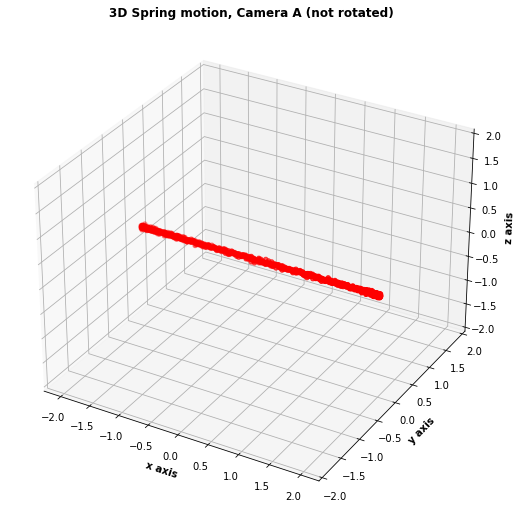

In [152]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x axis",fontweight='bold')
ax.set_ylabel("y axis",fontweight='bold')
ax.set_zlabel("z axis",fontweight='bold')
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_title("3D Spring motion, Camera A (not rotated)",fontweight='bold')
ax.scatter(x,y,z,color ="red")

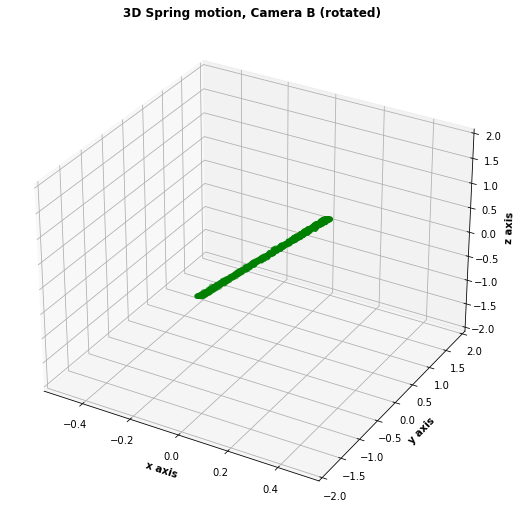

In [151]:
fig = plt.figure(figsize=(9,9))
ax2 = fig.add_subplot(projection='3d')
ax2.set_xlabel("x axis",fontweight='bold')
ax2.set_ylabel("y axis",fontweight='bold')
ax2.set_zlabel("z axis",fontweight='bold')
ax2.set_ylim(-2,2)
ax2.set_zlim(-2,2)
ax2.set_title("3D Spring motion, Camera B (rotated)",fontweight='bold')
ax2.scatter(dataset_rot1.iloc[0],dataset_rot1.iloc[1],dataset_rot1.iloc[2],color="green")

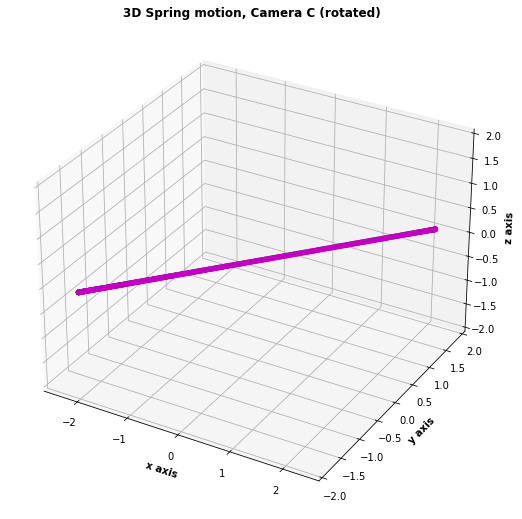

In [150]:
fig = plt.figure(figsize=(9,9))
ax3 = fig.add_subplot(projection='3d')
ax3.set_xlabel("x axis",fontweight='bold')
ax3.set_ylabel("y axis",fontweight='bold')
ax3.set_zlabel("z axis",fontweight='bold')
ax3.set_ylim(-2,2)
ax3.set_zlim(-2,2)
ax3.set_title("3D Spring motion, Camera C (rotated)",fontweight='bold')
ax3.scatter(dataset_rot2.iloc[0],dataset_rot2.iloc[1],dataset_rot2.iloc[2],color="m")

In [53]:
datasetAB = pd.merge(dataset, dataset_rot1, how='outer')
dataset_cameras_3d = pd.merge(datasetAB, dataset_rot2, how='outer')
dataset_cameras_3d.rename(index={0: "$x_A$", 1: "$y_A$", 2: "$z_A$", 3: "$x_B$", 4: "$y_B$", 5: "$z_B$", 6: "$x_C$", 7: "$y_C$",8: "$z_C$"})

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
$x_A$,-0.832294,-0.868497,-0.904352,-0.939846,-0.974964,-1.009692,-1.044016,-1.077923,-1.111398,-1.144429,...,-1.963573,-1.970780,-1.977198,-1.982825,-1.987659,-1.991698,-1.994940,-1.997384,-1.999030,-1.999876
$y_A$,-0.832294,-0.868497,-0.904352,-0.939846,-0.974964,-1.009692,-1.044016,-1.077923,-1.111398,-1.144429,...,-1.963573,-1.970780,-1.977198,-1.982825,-1.987659,-1.991698,-1.994940,-1.997384,-1.999030,-1.999876
$z_A$,0.002978,0.002019,0.017001,0.006927,0.014530,-0.003017,-0.011755,0.001021,0.001130,-0.012446,...,0.002877,-0.001766,-0.003947,-0.012697,0.004919,-0.015169,0.000756,-0.017369,-0.006875,-0.022771
$x_B$,0.859401,0.897282,0.927502,0.968824,1.001661,1.045614,1.085115,1.114329,1.148900,1.189279,...,2.029427,2.039006,2.046643,2.056470,2.053401,2.066779,2.062838,2.073668,2.070563,2.078719
$y_B$,0.753098,0.785071,0.828230,0.852988,0.890158,0.908834,0.933500,0.973309,1.003591,1.023601,...,1.773740,1.776892,1.781110,1.779875,1.796944,1.786098,1.800511,1.789641,1.798696,1.787992
$z_B$,-0.282325,-0.295170,-0.299618,-0.316956,-0.324985,-0.345944,-0.362190,-0.367118,-0.378479,-0.396796,...,-0.668224,-0.673093,-0.676415,-0.682879,-0.675378,-0.687189,-0.680024,-0.690272,-0.685383,-0.693927
$x_C$,-0.910658,-0.950259,-0.989629,-1.028370,-1.066864,-1.104697,-1.142171,-1.179387,-1.216015,-1.252028,...,-2.148413,-2.156255,-2.163256,-2.169332,-2.174785,-2.179017,-2.182712,-2.185218,-2.187116,-2.187894
$y_C$,0.380565,0.396188,0.425300,0.432796,0.455255,0.456005,0.464113,0.490452,0.505748,0.509128,...,0.894290,0.893588,0.894636,0.889700,0.906978,0.891614,0.906721,0.892313,0.902045,0.888819
$z_C$,0.641332,0.669791,0.689747,0.722367,0.745564,0.781453,0.812480,0.832069,0.857870,0.890396,...,1.515194,1.523159,1.529243,1.538110,1.532743,1.546240,1.540518,1.551770,1.547619,1.556484


In [127]:
#Here I extract the principal component (X_pc) of the dataset 

pca = PCA(n_components=1) 
X_pc = pca.fit_transform(dataset_cameras_3d.T) 

In [128]:
X_pc

array([[-1.81523258e+00],
       [-1.90391155e+00],
       [-1.99173877e+00],
       [-2.07868125e+00],
       [-2.16470198e+00],
       [-2.24976879e+00],
       [-2.33384587e+00],
       [-2.41689895e+00],
       [-2.49889658e+00],
       [-2.57980601e+00],
       [-2.65959328e+00],
       [-2.73822733e+00],
       [-2.81567565e+00],
       [-2.89191069e+00],
       [-2.96689922e+00],
       [-3.04061053e+00],
       [-3.11301646e+00],
       [-3.18408733e+00],
       [-3.25379660e+00],
       [-3.32211472e+00],
       [-3.38901478e+00],
       [-3.45446903e+00],
       [-3.51845213e+00],
       [-3.58093928e+00],
       [-3.64190614e+00],
       [-3.70132429e+00],
       [-3.75917294e+00],
       [-3.81542991e+00],
       [-3.87007054e+00],
       [-3.92307324e+00],
       [-3.97441943e+00],
       [-4.02408437e+00],
       [-4.07205060e+00],
       [-4.11829971e+00],
       [-4.16281095e+00],
       [-4.20556922e+00],
       [-4.24655440e+00],
       [-4.28575341e+00],
       [-4.3

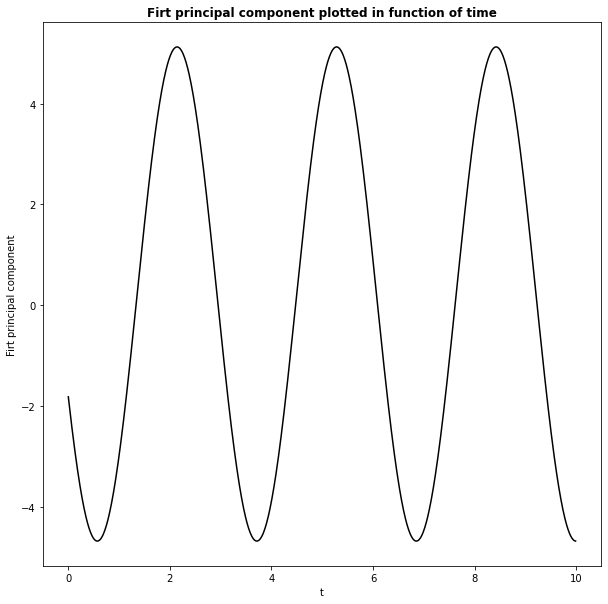

In [146]:
plt.figure(figsize=(10,10))
plt.xlabel("t")
plt.ylabel("Firt principal component")
plt.title("Firt principal component plotted in function of time",fontweight='bold')
plt.plot(t, X_pc[:,0],color="black")


From this plot it's evident that the first principal component is $x_A$, the x coordinate of the spring recorded by the camera perpendicular to the plane, and not rotated.

In [57]:
#In this case I have extracted the first 3 principal components 

pca3 = PCA(n_components=3) #numero di componenti principali da tenere
X_pc3 = pca3.fit_transform(dataset_cameras_3d.T) #applichiamo la PCA al nostro dataset di feature

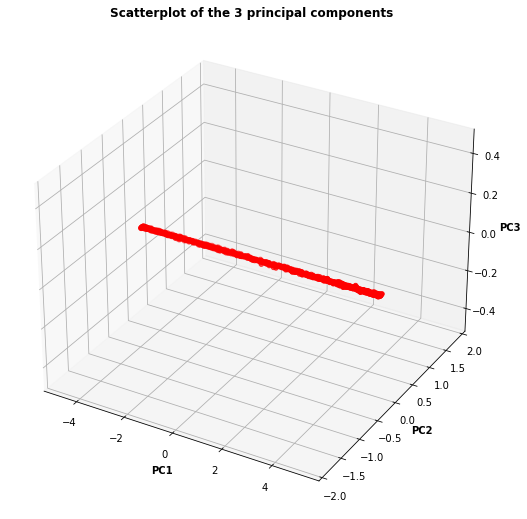

In [149]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("PC1",fontweight='bold')
ax.set_ylabel("PC2",fontweight='bold')
ax.set_zlabel("PC3",fontweight='bold')
ax.set_ylim(-2,2)
ax.set_zlim(-0.5,0.5)
ax.set_title("Scatterplot of the 3 principal components",fontweight='bold')
ax.scatter(X_pc3[:,0],X_pc3[:,1],X_pc3[:,2],color ="red")

As I expected, the three principal components are the $x_A, x_B, x_C$ components recorded by the camera not rotated